50   37


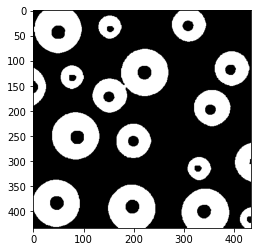

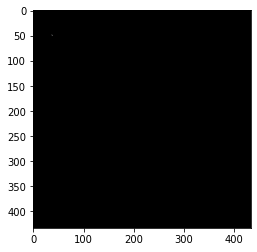

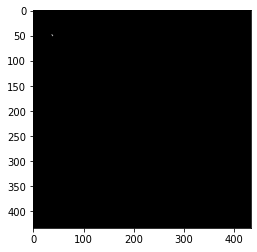

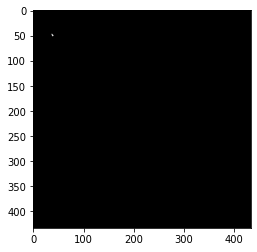

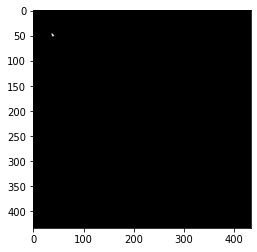

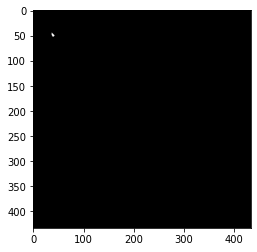

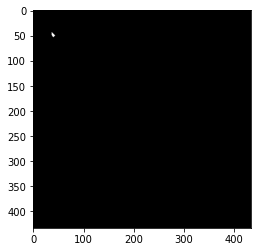

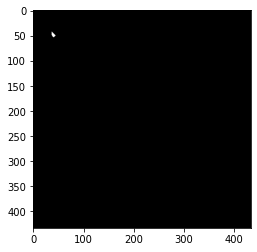

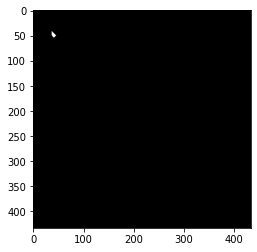

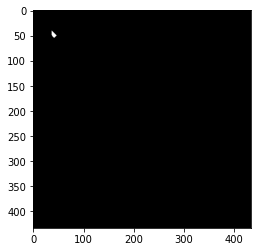

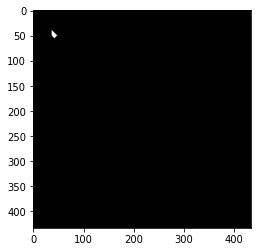

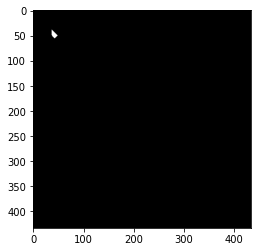

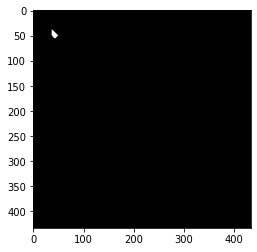

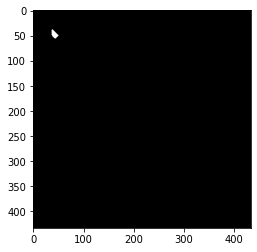

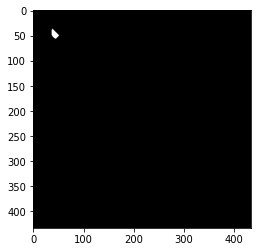

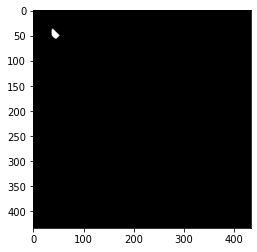

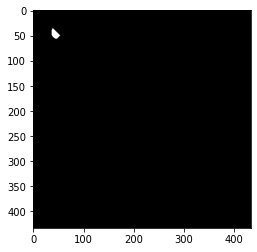

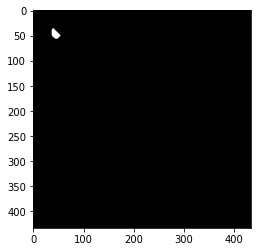

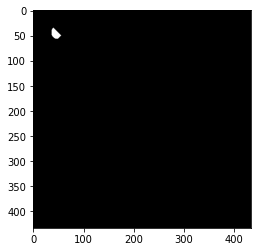

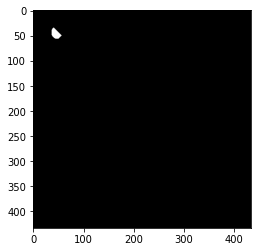

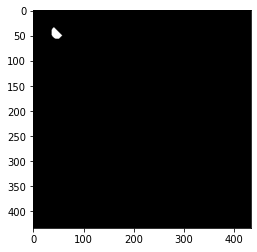

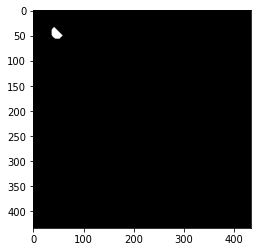

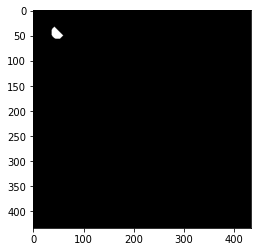

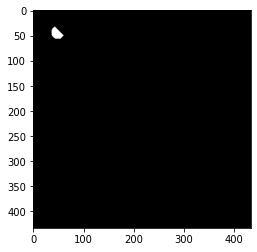

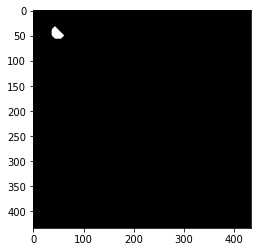

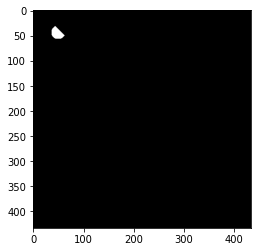

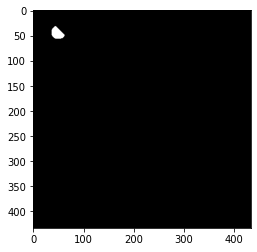

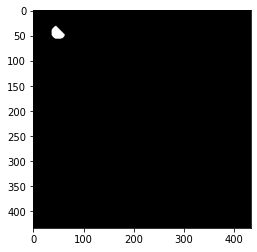

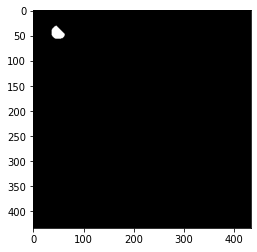

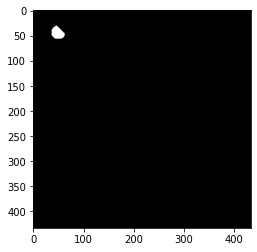

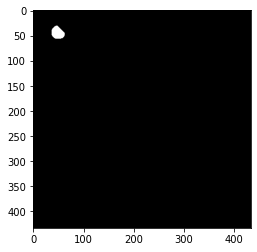

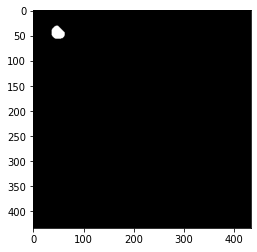

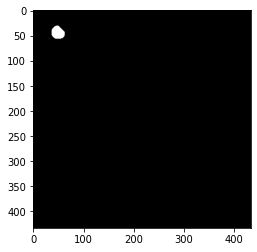

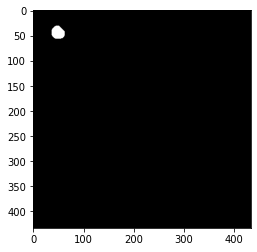

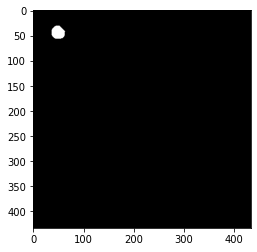

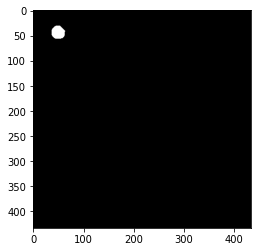

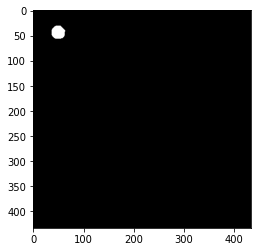

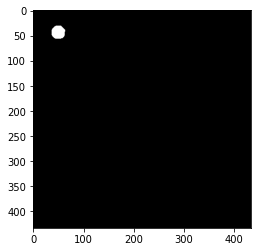

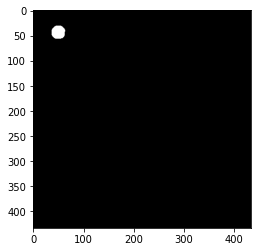

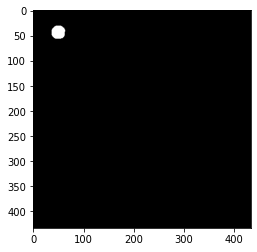

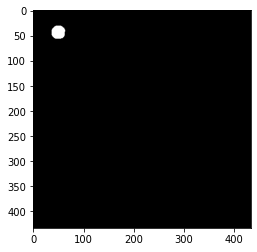

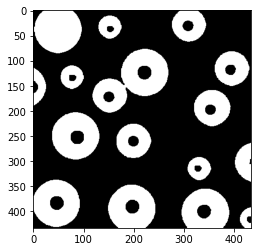

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 28 02:00:04 2022

@author: Asus
"""

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

x_p =[]
y_p = []

def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        x_p.append(x)
        y_p.append(y)
 
        # displaying the coordinates
        # on the image window
        # font = cv.FONT_HERSHEY_SIMPLEX
        # cv.putText(img, str(x) + ',' +
        #             str(y), (x,y), font,
        #             1, (255, 0, 0), 2)
        # cv.imshow('image', img)
 
    # checking for right mouse clicks    
    

path = "../img/hf.jpeg"

img = cv.imread('../img/hf.jpeg', 0)
cv.imshow('image', img) 

cv.setMouseCallback('image',click_event)

cv.waitKey(0) 
cv.destroyAllWindows()

# img = cv.imread(path, cv.IMREAD_GRAYSCALE)

# img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# plt.imshow(img,'gray')

# plt.show()

t,img = cv.threshold(img,180,255,cv.THRESH_BINARY)

img = img//255

plt.imshow(img,'gray')

plt.show()



kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

demo = np.zeros((img.shape[0],img.shape[1]),np.uint8)

demo[x_p[0]][y_p[0]] = 1

neg = 1-img

x0=demo

x0 = x0.astype(np.uint8)
while 1:
    tem = cv.dilate(x0,kernel,iterations = 1)
    tem = tem.astype(np.uint8)
    x1=np.bitwise_and(tem,neg)
    x1=x1.astype(np.uint8)
    plt.imshow(x1,'gray')
    plt.show()
    if(x1.sum()==x0.sum()):
        break
    x0=x1

op = np.zeros((img.shape[0],img.shape[1]),np.uint8)

op = np.bitwise_or(x0,img)

plt.imshow(op,'gray')
plt.show()